In [93]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

In [94]:
df = pd.read_json('../data/data.json')

In [95]:
df_shape = df.shape
print(f'Rows and columns in one JSON file is {df_shape}')

Rows and columns in one JSON file is (166, 6)


In [96]:
df_rows = df.head(10)
print(f'First 10 columns in one JSON file is {df_rows}')

First 10 columns in one JSON file is                    name artist  year gender   likes  bought
0                 Queen  Queen  1973   Rock  3258.0    True
1              Queen II  Queen  1974   Rock  4017.0    True
2    Sheer Heart Attack  Queen  1974   Rock  2427.0   False
3  A Night at the Opera  Queen  1975   Rock  2712.0   False
4     News of the World  Queen  1977   Rock  3488.0    True
5                  Jazz  Queen  1978   Rock  1377.0   False
6              The Game  Queen  1980   Rock  6636.0    True
7             Hot Space  Queen  1982   Rock  1762.0   False
8             The Works  Queen  1984   Rock  5530.0   False
9       A Kind of Magic  Queen  1986   Rock  3328.0    True


In [97]:
print(f'The column names are :')
print('#########')
for col in df.columns:
    print(col)

The column names are :
#########
name
artist
year
gender
likes
bought


In [98]:
cols = df.filter(regex='nam').columns

print(cols)

Index(['name'], dtype='object')


In [99]:
print("The #rows and #columns are ", df.shape[0] , " and ", df.shape[1])
print("The years in this dataset are: ", df.year.unique())
print("The artists covered in this dataset are: ", list(df.artist.unique()))
print("The genders covered are: ", list(df.gender.unique()))

The #rows and #columns are  166  and  6
The years in this dataset are:  [1973 1974 1975 1977 1978 1980 1982 1984 1986 1989 1991 1995 1993 1963
 1964 1965 1966 1967 1968 1970 1976 1979 1981 2021 2012 2015 2017 2018
 1999 2001 2003 2006 2009 2022 1969 1971 1972 1983 1987 1997 2002 2013
 2016 1996 2000 2010 2014 2004 2005 2008 2019 2020 2024 1956 1957 1960
 1961 1962 1985]
The artists covered in this dataset are:  ['Queen', 'Nirvana', 'The Beatles', 'ABBA', 'Imagine Dragons', 'MUSE', 'Rosalía', 'David Bowie', 'Spice Girls', 'Michael Jackson', 'Archive', 'Daft Punk', 'Taylor Swift', 'Elvis Presley', 'Supertramp']
The genders covered are:  ['Rock', 'Pop', 'Pop Rock', 'Alternative Rock', 'Flamenco', 'Electronic', 'Rock and Roll', 'Progressive pop']


In [100]:
dict = {'Rock': 0, 'Pop': 1, 'Pop Rock': 2, 'Alternative Rock': 3, 'Flamenco': 4, 'Electronic': 5, 'Rock and Roll' : 6, 'Progressive Pop':7}
df['gender'] = df['gender'].map(dict)

In [101]:
counts = pd.DataFrame({'Count':df.gender.value_counts()})
counts

,Count
gender,
0.0,64
1.0,36
6.0,23
5.0,16
3.0,9
2.0,4
4.0,3


In [102]:
counts.sort_values(by=['gender'],ascending=True).head(15)

,Count
gender,
0.0,64
1.0,36
2.0,4
3.0,9
4.0,3
5.0,16
6.0,23


In [103]:
df.rename(columns={'bought':'is_bought'}, inplace=True)

In [104]:
df.isnull().sum(axis=0)

name          0
artist        0
year          0
gender       11
likes         4
is_bought     0
dtype: int64

In [105]:
df = df[~df.likes.isnull()]
df.isnull().sum(axis = 0)

name          0
artist        0
year          0
gender       11
likes         0
is_bought     0
dtype: int64

is_bought
False     62
True     100
dtype: int64
162


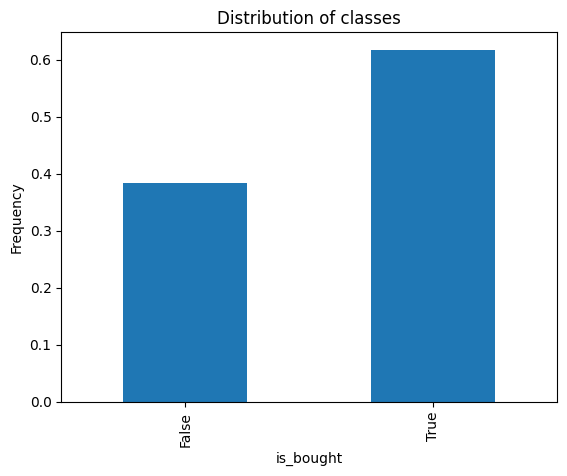

In [106]:
print(df.groupby('is_bought').size())
print(len(df))

(df.groupby('is_bought').size()/len(df) ).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.show()

In [107]:
data_orig = df.copy()
data = df[['is_bought', 'likes','name', 'artist', 'year', 'gender']]
categorical_columns  = ['name', 'artist', 'year']
for c in categorical_columns:
    data[c] = data[c].astype('category')
    
print(f'The column names are :')
print('#########')
for col in data.columns:
    print(col)

print(f'The column types are :')
print('#########')
for col in data.dtypes:
    print(col)

The column names are :
#########
is_bought
likes
name
artist
year
gender
The column types are :
#########
bool
float64
category
category
category
float64


In [108]:
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)
data_dummies = data_dummies.replace({True: 1, False: 0})
not_categorical_columns  = ['is_bought','gender']
data = pd.concat([data, data_dummies], axis = 1)
data.drop(categorical_columns,axis=1, inplace=True)

C:\Users\j.pardo\AppData\Local\Temp\ipykernel_7844\1784471954.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_dummies = data_dummies.replace({True: 1, False: 0})


In [109]:
print("The #rows and #columns are ", data.shape[0] , " and ", data.shape[1])

The #rows and #columns are  162  and  232


In [110]:
print(f'The column names are :')
print('#########')
for col in data.columns:
    print(col)

The column names are :
#########
is_bought
likes
gender
name_...Famous Last Words... 
name_1989
name_A Hard Day's Night
name_A Kind of Magic
name_A Night at the Opera
name_ABBA
name_Abbey Road
name_Absolution
name_Aladdin Sane
name_Arrival
name_Axiom
name_Bad
name_Beatles '65
name_Beatles VI
name_Beatles for Sale
name_Ben
name_Black Holes and Revelations
name_Black Tie White Noise
name_Bleach
name_Blood on the Dance Floor: History in the Mix
name_Breakfast in America
name_Brother Where You Bound
name_Call to Arms and Angels
name_Controlling Crowds
name_Controlling Crowds – Part IV
name_Crime of the Century 
name_Crisis? What Crisis?
name_Dangerous
name_Diamond Dogs
name_Discovery
name_Drones
name_Earthlinge
name_El mal querer
name_Elvis
name_Elvis Is Back!
name_Elvis Now
name_Elvis Presley
name_Elvis for Everyone!
name_Elvis sings The Wonderful World of Christmas
name_Elvis' Christmas Album
name_Even in the Quietest Moments...
name_Evermore
name_Fearless
name_Folklore
name_Forever
name

In [111]:
data.rename(columns = {'is_bought':'target'}, inplace=True )

In [112]:
X = np.array(data['gender']).reshape(-1, 1)
Y = np.array(data['target']).reshape(-1, 1)

In [113]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [114]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_test, y_test)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
y_pred = knn.predict(x_test)

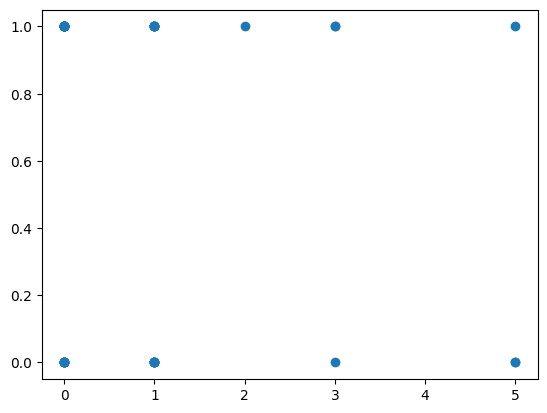

In [ ]:
plt.scatter(x_test, y_test)
plt.show()

In [ ]:
def plot_confusion_matrix(test_labels, target_predicted):
    matrix = confusion_matrix(test_labels, target_predicted)
    df_confusion = pd.DataFrame(matrix)
    colormap = sns.color_palette("BrBG", 10)
    sns.heatmap(df_confusion, annot=True, fmt='.2f', cbar=None, cmap=colormap)
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.ylabel("True Class")
    plt.xlabel("Predicted Class")
    plt.show()

In [ ]:
def plot_stats(test_labels, target_predicted):
    TN, FP, FN, TP = confusion_matrix(test_labels, target_predicted).ravel()

    sens  = float(TP)/(TP+FN)*100
    espc  = float(TN)/(TN+FP)*100
    Vpp = float(TP)/(TP+FP)*100
    Vpn = float(TN)/(TN+FN)*100
    ACC = float(TP+TN)/(TP+FP+FN+TN)*100
    classification_report_lr = classification_report(test_labels, target_predicted)

    print("K Nearest Neighbours Metrics:")
    print("Sensibilidad: ", sens, "%") 
    print("Especificidad: ",espc, "%") 
    print("Valor predictivo positivo ",Vpp, "%") 
    print("Valor predictivo negativo: ",Vpn, "%") 
    print("Eficacia: ",ACC, "%") 
    print('Reporte del clasificador:')
    print(classification_report_lr)

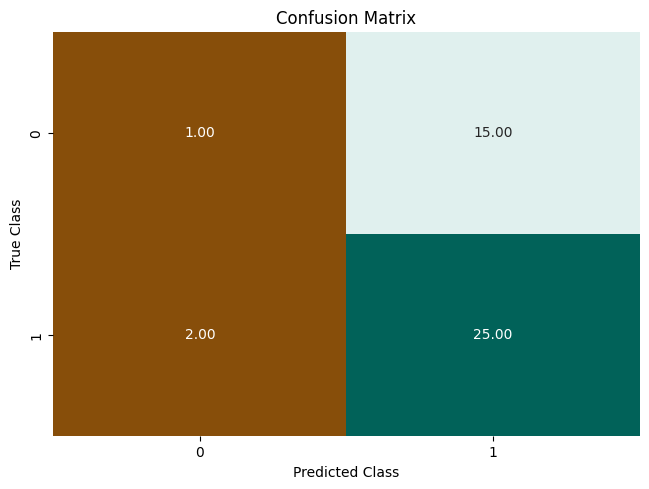

K Nearest Neighbours Metrics:
Sensibilidad:  92.5925925925926 %
Especificidad:  6.25 %
Valor predictivo positivo  62.5 %
Valor predictivo negativo:  33.33333333333333 %
Eficacia:  60.46511627906976 %
Reporte del clasificador:
              precision    recall  f1-score   support

       False       0.33      0.06      0.11        16
        True       0.62      0.93      0.75        27

    accuracy                           0.60        43
   macro avg       0.48      0.49      0.43        43
weighted avg       0.52      0.60      0.51        43



In [ ]:
plot_confusion_matrix(y_test, y_pred)
plot_stats(y_test, y_pred)